# TOP 500 do Rock (2015-2022)

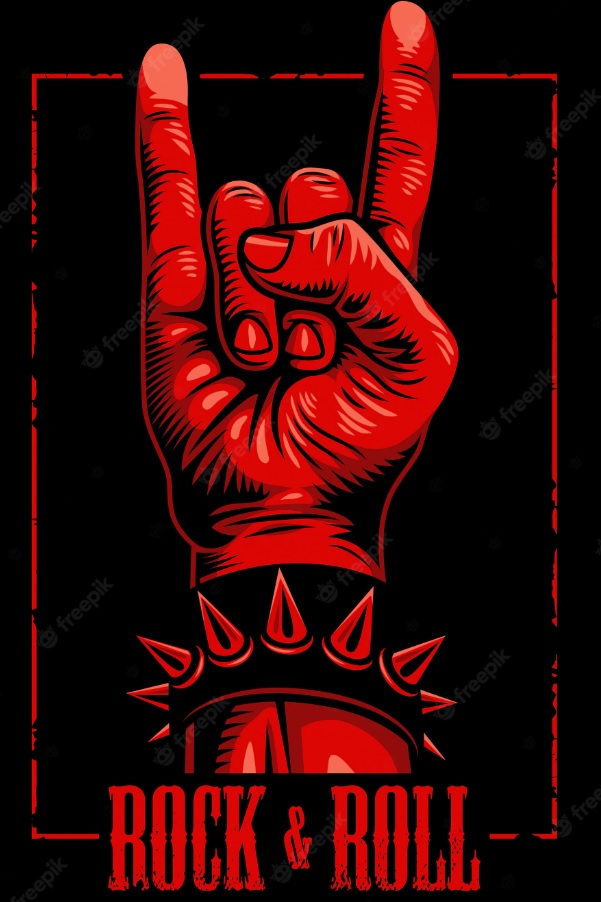

O dataset a seguir representa a quantidade de vezes que as músicas do gênero Rock (compostos de subgêneros) 
entraram para a lista de top 500 mais tocadas no mundo, nos anos de 2015 a 2020. 
Ainda é importante mencionar que o dataset é público e está disponível na plataforma kaggle.
Não foi encontrado nenhum tipo de dicionário. Diante disso, as colunas cujos nomes são referentes aos anos foram interpretadas como posicionais.
O material não é uma versão para o cliente final, mas sim, um trabalho de estudo.Então pode conter códigos de profissionais e entusiastas da área, até eu poder dissecá-los futuramente. E está na primeira versão.

In [1]:
#Python Version
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
#the way of python
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\User\naconda3\python.exe
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)


In [3]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [4]:
# Import para manipulação
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as datetime
warnings.filterwarnings('ignore')

In [5]:
# datetime is installed by naconda prompt
!pip show datetime

Name: DateTime
Version: 5.0
Summary: This package provides a DateTime data type, as known from Zope. Unless you need to communicate with Zope APIs, you're probably better off using Python's built-in datetime module.
Home-page: https://github.com/zopefoundation/DateTime
Author: Zope Foundation and Contributors
Author-email: zope-dev@zope.org
License: ZPL 2.1
Location: c:\users\user\naconda3\lib\site-packages
Requires: pytz, zope.interface
Required-by: 


In [6]:
# version packages in this jupyter notebook
%reload_ext watermark
%watermark -a "Rock Project" --iversions

Author: Rock Project

datetime  : 5.0
seaborn   : 0.11.2
numpy     : 1.21.5
sys       : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.5.2
pandas    : 1.4.4



In [7]:
data = pd.read_csv("classic_rock_playlist.csv")

In [8]:
data.shape

(500, 13)

In [9]:
data.head()

,Artist,Music,Album,Year,Genre,2022,2021,2020,2019,2018,2017,2016,2015
0,The Black Crowes,Remedy,The Southern Harmony and Musical Companion,1992,Southern Rock,500,NaN,324.0,290.0,132.0,64.0,36.0,NaN
1,Asia,Only Time Will Tell,Asia,1982,Progressive Rock,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Collective Soul,Shine,Hints Allegations and Things Left Unsaid,1993,Alternative Rock,498,NaN,NaN,419.0,485.0,403.0,NaN,NaN
3,Billy Idol,Sweet Sixteen,Whiplash Smile,1986,Rock,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Collective Soul,December,Collective Soul,1995,Alternative Rock,496,NaN,NaN,NaN,431.0,443.0,NaN,NaN


In [10]:
data.columns

Index(['Artist', 'Music', 'Album', 'Year', 'Genre', '2022', '2021', '2020',
       '2019', '2018', '2017', '2016', '2015'],
      dtype='object')

In [11]:
nan_count = data.isna().sum()
print(nan_count )

Artist      0
Music       0
Album       3
Year        0
Genre       0
2022        0
2021      192
2020      261
2019      239
2018      240
2017      240
2016      274
2015      315
dtype: int64


In [12]:
# Em álbum, tem valores nulos. Localizá-los e substituí-los de acordo com o site vagalume.

In [13]:
# data.loc[data['Album'] ==  ]    para procuarar por linha qualquer valor.

In [14]:
# Os álbuns cujos nomes estão ausente coincidem ou não por ser álbuns de caracteres numéricos.
nan_album  = data[data['Album'].isna()]
print(nan_album)

        Artist                    Music Album  Year            Genre  2022  \
402  Van Halen                   Panama   NaN  1984       Glam Metal    98   
418  Van Halen                     Jump   NaN  1984         Pop Rock    82   
421        Yes  Owner of a Lonely Heart   NaN  1983  Progressive Pop    79   

      2021   2020   2019  2018   2017   2016   2015  
402  191.0   84.0  305.0  57.0  125.0  350.0   30.0  
418  128.0    6.0  126.0  44.0   87.0  201.0   40.0  
421   60.0  106.0  304.0  81.0  150.0  143.0  271.0  


In [15]:
# a fim de tirar a poluição
datab = data[['Artist','Album', 'Music', 'Year']]
nan_albumb  = datab[datab['Album'].isna()]
print(nan_albumb)

        Artist Album                    Music  Year
402  Van Halen   NaN                   Panama  1984
418  Van Halen   NaN                     Jump  1984
421        Yes   NaN  Owner of a Lonely Heart  1983


In [16]:
data.loc[[402, 418, 421], ["Album"]]

,Album
402,NaN
418,NaN
421,NaN


In [17]:
# Aqui têm-se a substituição do valor ausente pelos nomes devidamente pesquisados
data.at[402, 'Album'] = '1984'
data.at[418, 'Album'] = '1984'
data.at[421, 'Album'] = '90125'

In [18]:
data.loc[[402, 418, 421], ["Album"]]

,Album
402,1984
418,1984
421,90125


In [19]:
# Year convertido para string a fim de poder trabalhá-lo de forma categórica.
data['Year'] = data['Year'].astype(str)

In [20]:
data.describe()

,2022,2021,2020,2019,2018,2017,2016,2015
count,500.000000,308.000000,239.000000,261.000000,260.000000,260.000000,226.000000,185.000000
mean,250.500000,215.678571,194.100418,205.965517,205.207692,202.761538,202.407080,192.859459
std,144.481833,143.103220,137.759954,141.672791,143.994809,142.230891,145.698327,140.349609
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,125.750000,86.750000,74.500000,81.000000,75.500000,76.500000,74.250000,66.000000
50%,250.500000,202.000000,173.000000,180.000000,179.000000,182.500000,178.000000,176.000000
75%,375.250000,329.250000,305.500000,317.000000,322.500000,312.500000,328.250000,294.000000
max,500.000000,500.000000,499.000000,494.000000,496.000000,500.000000,498.000000,500.000000


In [21]:
# Os anos convertidos para inteiros - não faz sentido ser o primeiro colocado e meio. E ainda tem a poluição vizual.

In [22]:
data['2021'] = data['2021'].astype('Int64')
data['2020'] = data['2020'].astype('Int64')
data['2019'] = data['2019'].astype('Int64')
data['2018'] = data['2018'].astype('Int64')
data['2017'] = data['2017'].astype('Int64')
data['2016'] = data['2016'].astype('Int64')
data['2015'] = data['2015'].astype('Int64')

In [23]:
# formas alternativas e mais bonitas de alterar os tipos das colunas. Exemplo
#df['Cód. Empresa'] = df['Cód. Empresa'].astype(int)
#pd.to_numeric(df['Grupo Cód.’])
#df['PLoa'] = df['PLoa'].str.replace('.','')
#df.astype({
    #'Exercício':'datetime64',
    #'Grupo Cód.':int,
    #'Cód. Empresa':int,
    #'PLoa':float
#})

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  500 non-null    object
 1   Music   500 non-null    object
 2   Album   500 non-null    object
 3   Year    500 non-null    object
 4   Genre   500 non-null    object
 5   2022    500 non-null    int64 
 6   2021    308 non-null    Int64 
 7   2020    239 non-null    Int64 
 8   2019    261 non-null    Int64 
 9   2018    260 non-null    Int64 
 10  2017    260 non-null    Int64 
 11  2016    226 non-null    Int64 
 12  2015    185 non-null    Int64 
dtypes: Int64(7), int64(1), object(5)
memory usage: 54.3+ KB


In [25]:
# Visão muito mais agradável. 
# É possível de concluir que nos anos de 2020,2019,2018,2016 
# as músicas que entraram para esse dataset não assumiram a última posição.
data.describe().applymap('{:,.0f}'.format)

,2022,2021,2020,2019,2018,2017,2016,2015
count,500,308,239,261,260,260,226,185
mean,250,216,194,206,205,203,202,193
std,144,143,138,142,144,142,146,140
min,1,1,1,1,1,1,1,1
25%,126,87,74,81,76,76,74,66
50%,250,202,173,180,179,182,178,176
75%,375,329,306,317,322,312,328,294
max,500,500,499,494,496,500,498,500


In [26]:
# Verificando os valores ausentes. Muito provavelmente tais bandas e não entraram nesse hall
# Então, suponho que houve entrada de outros cantores/bandas que não se encaixam no gênero Rock.
data.head()

,Artist,Music,Album,Year,Genre,2022,2021,2020,2019,2018,2017,2016,2015
0,The Black Crowes,Remedy,The Southern Harmony and Musical Companion,1992,Southern Rock,500,<NA>,324,290,132,64,36,<NA>
1,Asia,Only Time Will Tell,Asia,1982,Progressive Rock,499,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Collective Soul,Shine,Hints Allegations and Things Left Unsaid,1993,Alternative Rock,498,<NA>,<NA>,419,485,403,<NA>,<NA>
3,Billy Idol,Sweet Sixteen,Whiplash Smile,1986,Rock,497,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Collective Soul,December,Collective Soul,1995,Alternative Rock,496,<NA>,<NA>,<NA>,431,443,<NA>,<NA>


In [27]:
# Busca por nome de uma música
general_position_music  = data[data['Music'] == "The Number of the Beast"]
print(general_position_music)

          Artist                    Music                    Album  Year  \
487  Iron Maiden  The Number of the Beast  The Number of the Beast  1982   

           Genre  2022  2021  2020  2019  2018  2017  2016  2015  
487  Heavy Metal    13     7     9    10    16    15     7     1  


In [28]:
# Busca por uma posição de determinado ano.
year_2015_min_music = data[data['2015'] == 500.0]
print(year_2015_min_music)

       Artist                  Music        Album  Year    Genre  2022  2021  \
87  The Verve  Bitter Sweet Symphony  Urban Hymns  1997  Britpop   413   435   

    2020  2019  2018  2017  2016  2015  
87   322   180   416   378   391   500  


In [29]:
# Overwill a fim de saber quem aparece mais coloca músicas nessa lista.
data['Artist'].value_counts()

Aerosmith             17
The Beatles           14
Bon Jovi              12
Van Halen             12
The Rolling Stones    10
                      ..
Tommy Tutone           1
Soundgarden            1
The Verve              1
Social Distortion      1
Eagles                 1
Name: Artist, Length: 202, dtype: int64

In [30]:
data['Genre'].value_counts()

Hard Rock            102
Pop Rock              54
Heavy Metal           35
Alternative Rock      33
Progressive Rock      28
                    ... 
Orchestral Pop         1
Alternative Metal      1
Rap Rock               1
Pop Punk               1
Thrash Metal           1
Name: Genre, Length: 61, dtype: int64

In [31]:
# Como uma música pode aparecer duas vezes nesta coluna? Logo, existem bandas que tem músicas com o mesmo nome, curioso não?
data[['Music']].value_counts()

Music           
Zombie              2
American Woman      2
I Fought the Law    2
One                 2
Dream On            2
                   ..
Guilty of Love      1
Guardian            1
Goodbye Stranger    1
Godzilla            1
Live and Let Die    1
Length: 492, dtype: int64

In [32]:
# Aqui The Cranberries é Diferente de Social Distortion
general_position_zombie  = data[data['Music'] == "Zombie"]
print(general_position_zombie)

                Artist   Music                              Album  Year  \
81   Social Distortion  Zombie  Somewhere Between Heaven and Hell  1992   
107    The Cranberries  Zombie                   No Need to Argue  1994   

                Genre  2022  2021  2020  2019  2018  2017  2016  2015  
81   Alternative Rock   419    63  <NA>    94  <NA>  <NA>  <NA>  <NA>  
107  Alternative Rock   393    63  <NA>    94  <NA>  <NA>  <NA>  <NA>  


In [33]:
# Aqui é a mesma música como uma versão diferente - ouvi no youtube. Concluímos que diferente ou não, não podem ser somadas
general_position_dreamon  = data[data['Music'] == "Dream On"]
print(general_position_dreamon)

                       Artist     Music  \
274  Dio and Yngwie Malmsteen  Dream On   
375                 Aerosmith  Dream On   

                                           Album  Year      Genre  2022  2021  \
274  Tribute To Aerosmith: Not The Same Old Song  1999  Hard Rock   226    43   
375                                    Aerosmith  1973  Hard Rock   125  <NA>   

     2020  2019  2018  2017  2016  2015  
274  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
375    13    12    18    18    25  <NA>  


In [34]:
# Todas as músicas com os mesmos nomes.
song_same_name = data[data['Music'].duplicated(keep=False)]
print(song_same_name)

                       Artist             Music  \
23                  The Clash  I Fought the Law   
31         Jefferson Airplane  Somebody to Love   
81          Social Distortion            Zombie   
103                 Van Halen            Dreams   
107           The Cranberries            Zombie   
121                   The Who        Substitute   
132             Lenny Kravitz    American Woman   
156                Stray Cats  I Fought the Law   
182                     Queen  Somebody to Love   
188             Fleetwood Mac            Dreams   
236             The Guess Who    American Woman   
250                   Ramones        Substitute   
274  Dio and Yngwie Malmsteen          Dream On   
369                        U2               One   
375                 Aerosmith          Dream On   
496                 Metallica               One   

                                           Album  Year             Genre  \
23                            The Cost of Living  1979  

In [35]:
# Visão de forma mais clara.
song_same_name['Music'].value_counts()

I Fought the Law    2
Somebody to Love    2
Zombie              2
Dreams              2
Substitute          2
American Woman      2
Dream On            2
One                 2
Name: Music, dtype: int64

In [36]:
# Visão de forma mais clara.
song_same_name['Artist'].value_counts()

The Clash                   1
Jefferson Airplane          1
Social Distortion           1
Van Halen                   1
The Cranberries             1
The Who                     1
Lenny Kravitz               1
Stray Cats                  1
Queen                       1
Fleetwood Mac               1
The Guess Who               1
Ramones                     1
Dio and Yngwie Malmsteen    1
U2                          1
Aerosmith                   1
Metallica                   1
Name: Artist, dtype: int64

In [37]:
# Total das canções
song_same_name['Music'].value_counts().sum()

16

In [38]:
song_same_name_music_artist = song_same_name[["Music",'Artist']]

In [39]:
song_same_name_music_artist

,Music,Artist
23,I Fought the Law,The Clash
31,Somebody to Love,Jefferson Airplane
81,Zombie,Social Distortion
103,Dreams,Van Halen
107,Zombie,The Cranberries
121,Substitute,The Who
132,American Woman,Lenny Kravitz
156,I Fought the Law,Stray Cats
182,Somebody to Love,Queen
188,Dreams,Fleetwood Mac


In [40]:
# Visão mais clara.
song_same_name_music_artist_by_music = song_same_name_music_artist.groupby('Music')['Artist'].apply(list)
song_same_name_music_artist_by_music

Music
American Woman             [Lenny Kravitz, The Guess Who]
Dream On            [Dio and Yngwie Malmsteen, Aerosmith]
Dreams                         [Van Halen, Fleetwood Mac]
I Fought the Law                  [The Clash, Stray Cats]
One                                       [U2, Metallica]
Somebody to Love              [Jefferson Airplane, Queen]
Substitute                             [The Who, Ramones]
Zombie               [Social Distortion, The Cranberries]
Name: Artist, dtype: object

# Top Songs from 2015-2022

Como eu tenho bandas com nome de músicas iguais, deve alterar o dataset para eventuais equívocos de análise

In [41]:
data1 = data

In [42]:
data1["Music_Artist"] = data1['Music'] + " - " + data1["Artist"]

In [43]:
data1["Album_Artist"] = data1['Album'] + " - " + data1["Artist"]

In [44]:
data1.head()

,Artist,Music,Album,Year,Genre,2022,2021,2020,2019,2018,2017,2016,2015,Music_Artist,Album_Artist
0,The Black Crowes,Remedy,The Southern Harmony and Musical Companion,1992,Southern Rock,500,<NA>,324,290,132,64,36,<NA>,Remedy - The Black Crowes,The Southern Harmony and Musical Companion - T...
1,Asia,Only Time Will Tell,Asia,1982,Progressive Rock,499,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Only Time Will Tell - Asia,Asia - Asia
2,Collective Soul,Shine,Hints Allegations and Things Left Unsaid,1993,Alternative Rock,498,<NA>,<NA>,419,485,403,<NA>,<NA>,Shine - Collective Soul,Hints Allegations and Things Left Unsaid - Col...
3,Billy Idol,Sweet Sixteen,Whiplash Smile,1986,Rock,497,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Sweet Sixteen - Billy Idol,Whiplash Smile - Billy Idol
4,Collective Soul,December,Collective Soul,1995,Alternative Rock,496,<NA>,<NA>,<NA>,431,443,<NA>,<NA>,December - Collective Soul,Collective Soul - Collective Soul


# Qual música ficou em primeiro lugar no ano de 2015 e em segundo?

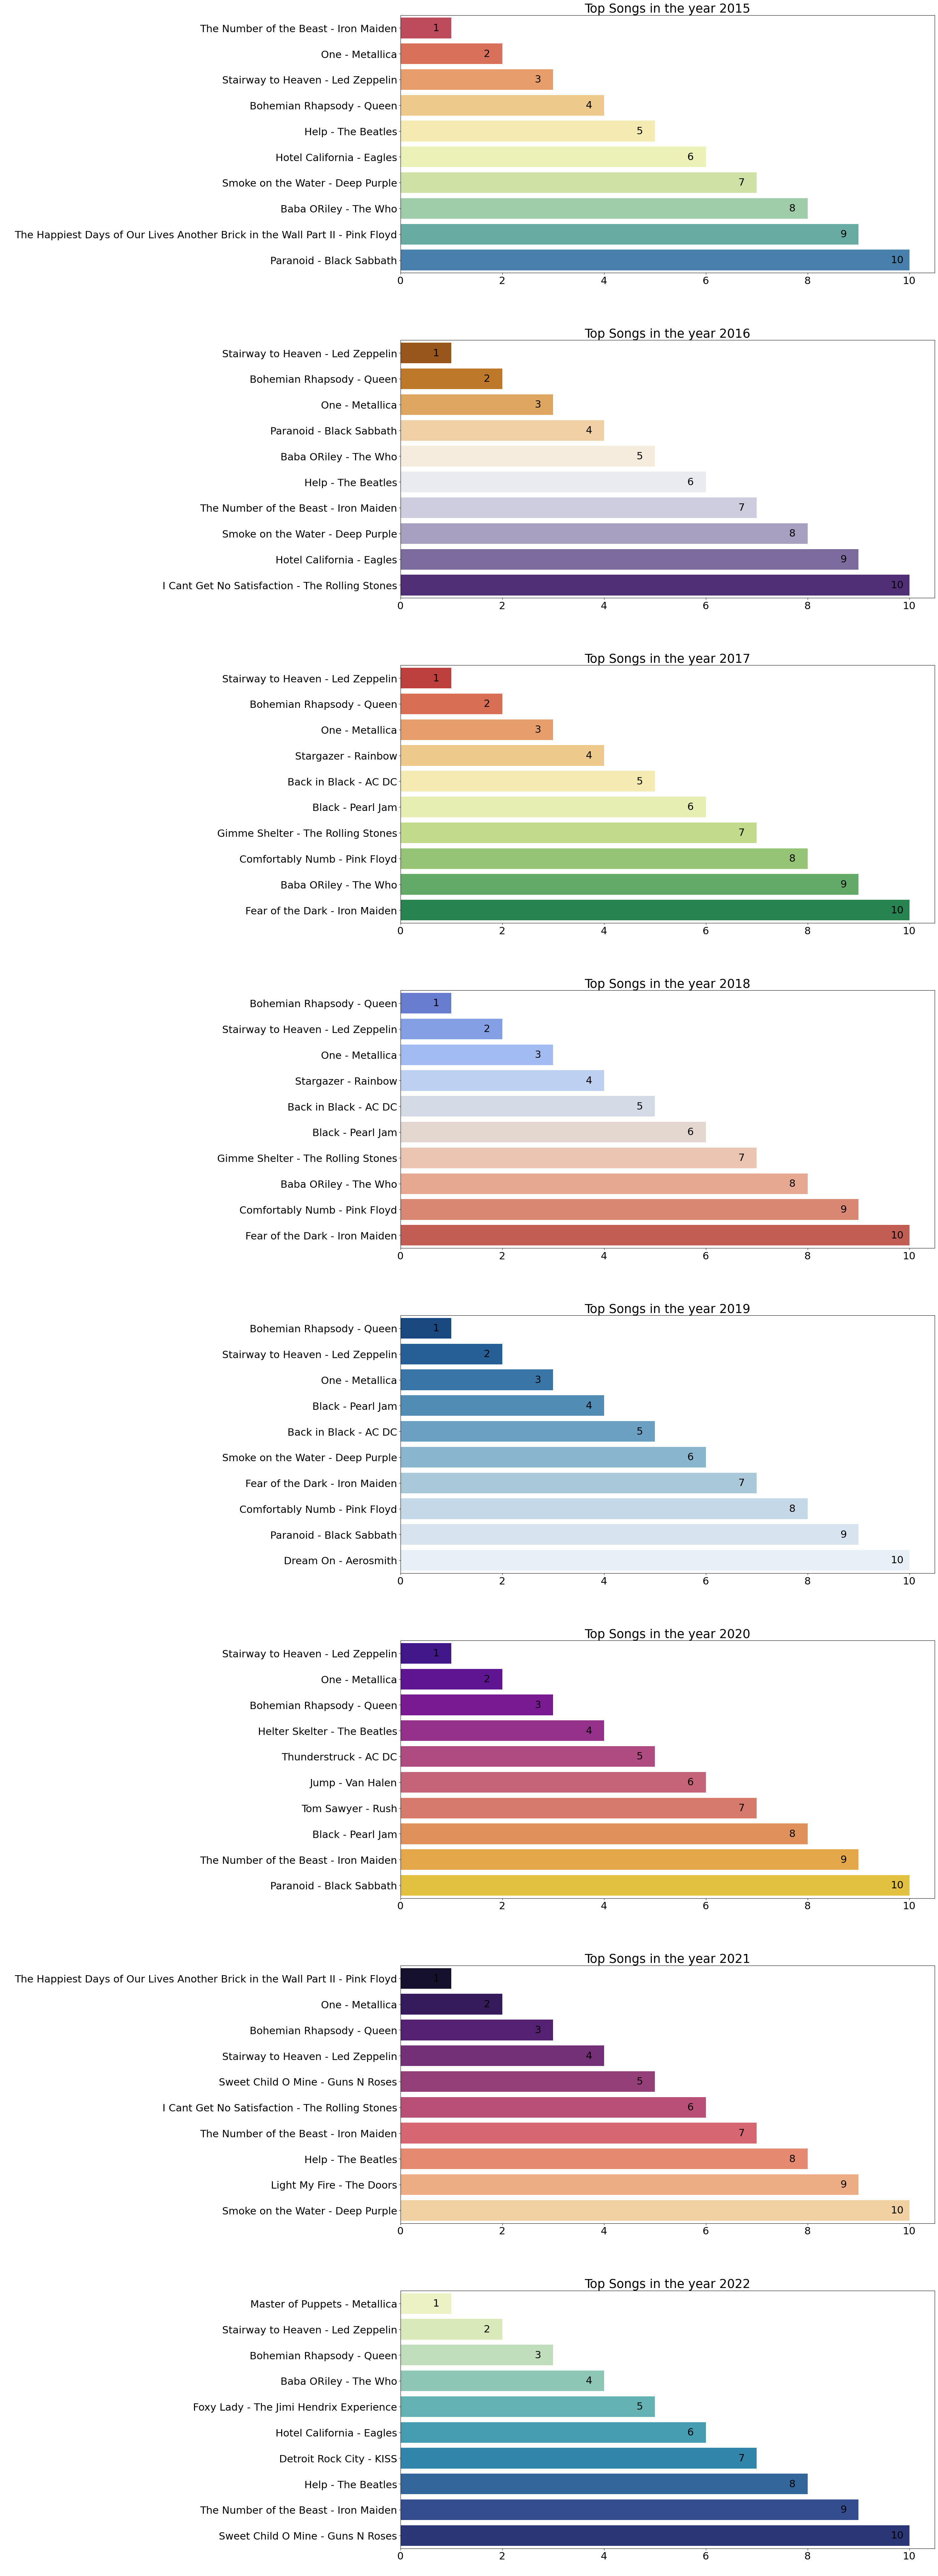

In [45]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20,80)

fig, axs = plt.subplots(8,1)
#plt.suptitle("Top 25 Artists with most Hit songs")
x=0
fig.tight_layout(pad=5.0)

colors = ["Spectral",
"PuOr",
"RdYlGn",
"coolwarm",
"Blues_r",
"plasma",
"magma",      
"YlGnBu"]

for i in range(2015,2023):
    df = data.sort_values(str(i), ascending=True)
    df_top25 = df.head(25)
    df_top25 = df_top25.drop_duplicates(subset="Artist", keep='first')
    df_top25 = df_top25.head(10)
    
    df_top25[str(i)] = [o+1 for o, row in enumerate(df_top25.itertuples())]
    p=sns.barplot(y="Music_Artist", x=str(i), data=df_top25, ax=axs[x], palette=colors[x])
    axs[x].set_ylabel(' ')
    axs[x].set_xlabel(' ')
    axs[x].set_title('Top Songs in the year '+str(i))
    for container in p.containers:
        p.bar_label(container, padding=-40)
    x+=1

plt.show()

# Top Artists from 2015-2022

Eu quis ficar com o cógigo, mesmo ele sendo desnecessário. Pois o artista já está nos gráficos acima.

In [46]:
#plt.rcParams.update({'font.size': 22})
#plt.rcParams["figure.figsize"] = (20,80)

#fig, axs = plt.subplots(8,1)
##plt.suptitle("Top 25 Artists with most Hit songs")
#x=0
#fig.tight_layout(pad=5.0)
#colors = ["Spectral",
#"PuOr",
#"RdYlGn",
#"coolwarm",
#"Blues_r",
#"plasma",
#"magma",      
#"YlGnBu"]
#for i in range(2015,2023):
    #df = data.sort_values(str(i), ascending=True)
    #df_top25 = df.head(25)
    #df_top25 = df_top25.drop_duplicates(subset="Artist", keep='first')
    #df_top25 = df_top25.head(10)
    
    #df_top25[str(i)] = [o+1 for o, row in enumerate(df_top25.itertuples())]
    #p=sns.barplot(y="Artist", x=str(i), data=df_top25, ax=axs[x], palette=colors[x])
    #axs[x].set_ylabel(' ')
    #axs[x].set_xlabel(' ')
    #axs[x].set_title('Top Artists in the year '+str(i))
    #for container in p.containers:
        #p.bar_label(container, padding=-40)
    #x+=1

#plt.show()

# Top Genres from 2015-2022

Aqui a gente percebe que poderia acrescentar lá nos primeiros gráficos, mas eu optei por rodar o código de novo, para ter de exemplo.

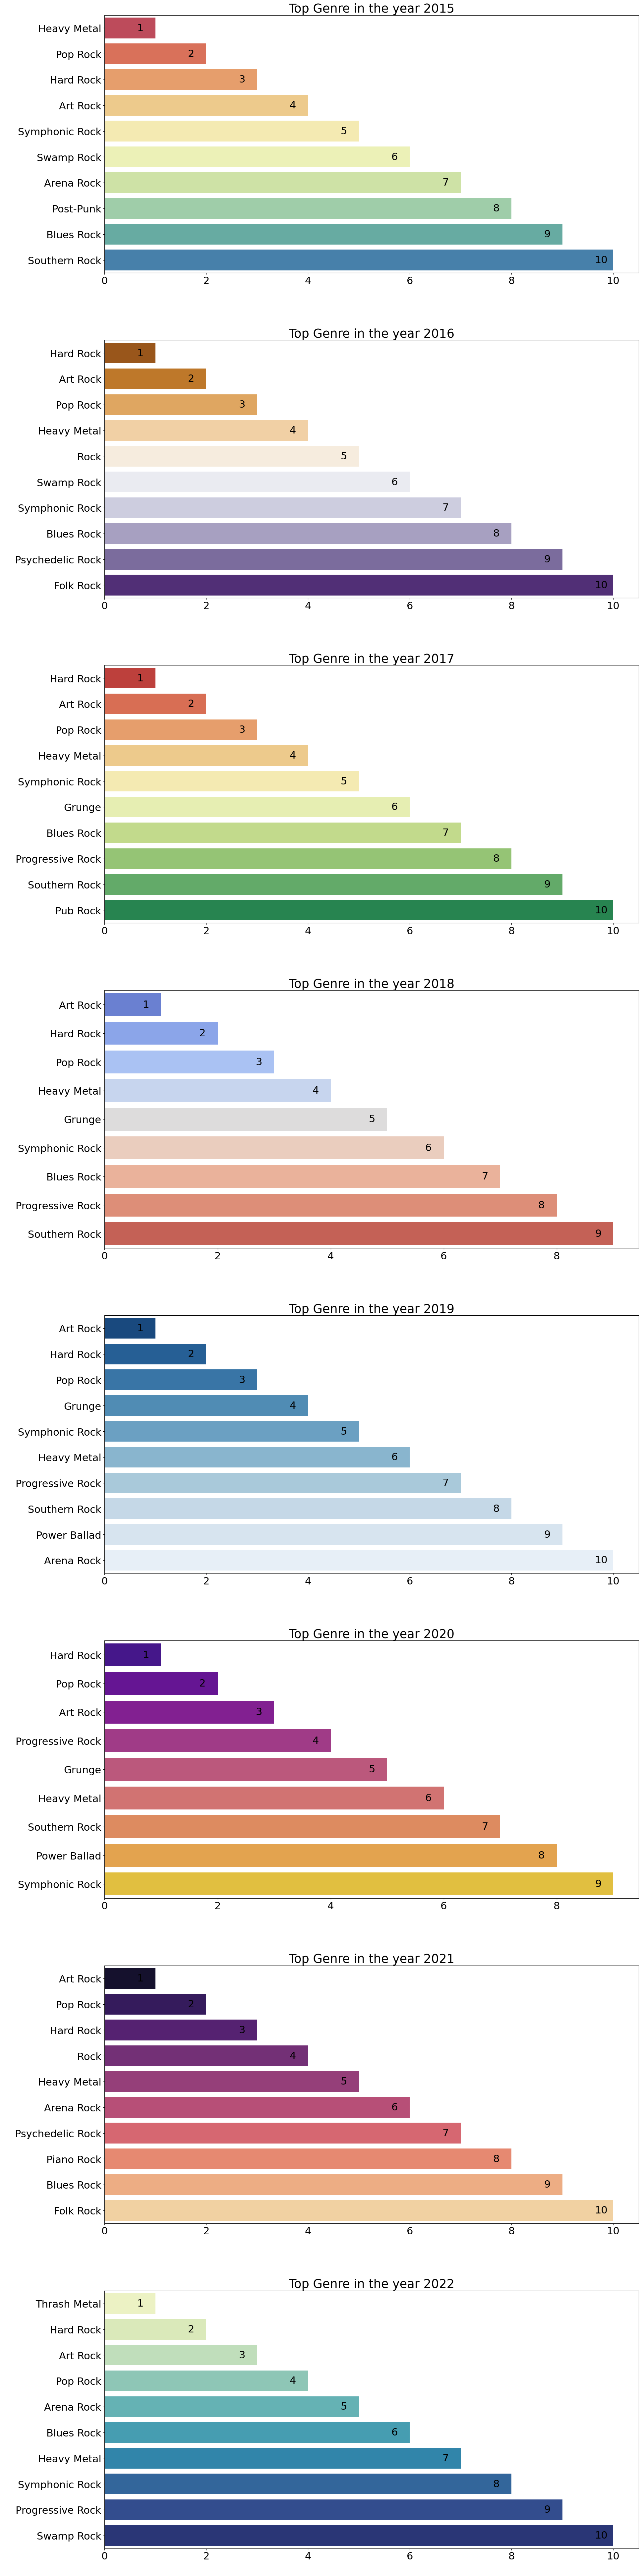

In [47]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20,80)

fig, axs = plt.subplots(8,1)
#plt.suptitle("Top 25 Artists with most Hit songs")
x=0
fig.tight_layout(pad=5.0)
colors = ["Spectral",
"PuOr",
"RdYlGn",
"coolwarm",
"Blues_r",
"plasma",
"magma",      
"YlGnBu"]
for i in range(2015,2023):
    df = data.sort_values(str(i), ascending=True)
    df_top25 = df.head(25)
    df_top25 = df_top25.drop_duplicates(subset="Genre", keep='first')
    df_top25 = df_top25.head(10)
    
    df_top25[str(i)] = [o+1 for o, row in enumerate(df_top25.itertuples())]
    p=sns.barplot(y="Genre", x=str(i), data=df_top25, ax=axs[x], palette=colors[x])
    axs[x].set_ylabel(' ')
    axs[x].set_xlabel(' ')
    axs[x].set_title('Top Genre in the year '+str(i))
    for container in p.containers:
        p.bar_label(container, padding=-40)
    x+=1

plt.show()

# Top Albums with most diffetent hits

In [48]:
data['Album'].value_counts()

Single                            22
Are You Experienced                4
Pump                               4
Whats the Story Morning Glory?     4
Love                               4
                                  ..
Agent Provocateur                  1
Heartbreaker                       1
A Space in Time                    1
Images and Words                   1
Master of Puppets                  1
Name: Album, Length: 384, dtype: int64

In [49]:
#Single não é Album
general_position_single  = data[data['Album'] == "Single"]
#print(general_position_single)

In [50]:
general_position_single[['Artist', 'Album']]

,Artist,Album
16,The Smiths,Single
20,Alabama Shakes,Single
24,Stray Cats,Single
121,The Who,Single
141,Toy Dolls,Single
161,The Hollies,Single
166,Roy Orbison,Single
171,The Rolling Stones,Single
192,The Who,Single
218,Nirvana,Single


In [51]:
general_position_single['Artist'].value_counts()

The Beatles                    4
The Who                        3
Elvis Presley                  3
The Smiths                     1
Alabama Shakes                 1
Stray Cats                     1
Toy Dolls                      1
The Hollies                    1
Roy Orbison                    1
The Rolling Stones             1
Nirvana                        1
Motorhead                      1
David Bowie and Mick Jagger    1
Deep Purple                    1
Chubby Checker                 1
Name: Artist, dtype: int64

In [52]:
data2 = data1[['Album_Artist']]

In [53]:
data2 = data2[data2.Album_Artist.str.contains("Single") == False]

In [54]:
data2.value_counts()

Album_Artist                                      
Pump - Aerosmith                                      4
Love - The Cult                                       4
Whats the Story Morning Glory? - Oasis                4
Are You Experienced - The Jimi Hendrix Experience     4
Metallica - Metallica                                 3
                                                     ..
Fragile - Yes                                         1
Forty Licks - The Rolling Stones                      1
Force it - UFO                                        1
For Unlawful Carnal Knowledge - Van Halen             1
You Could Have It So Much Better - Franz Ferdinand    1
Length: 383, dtype: int64

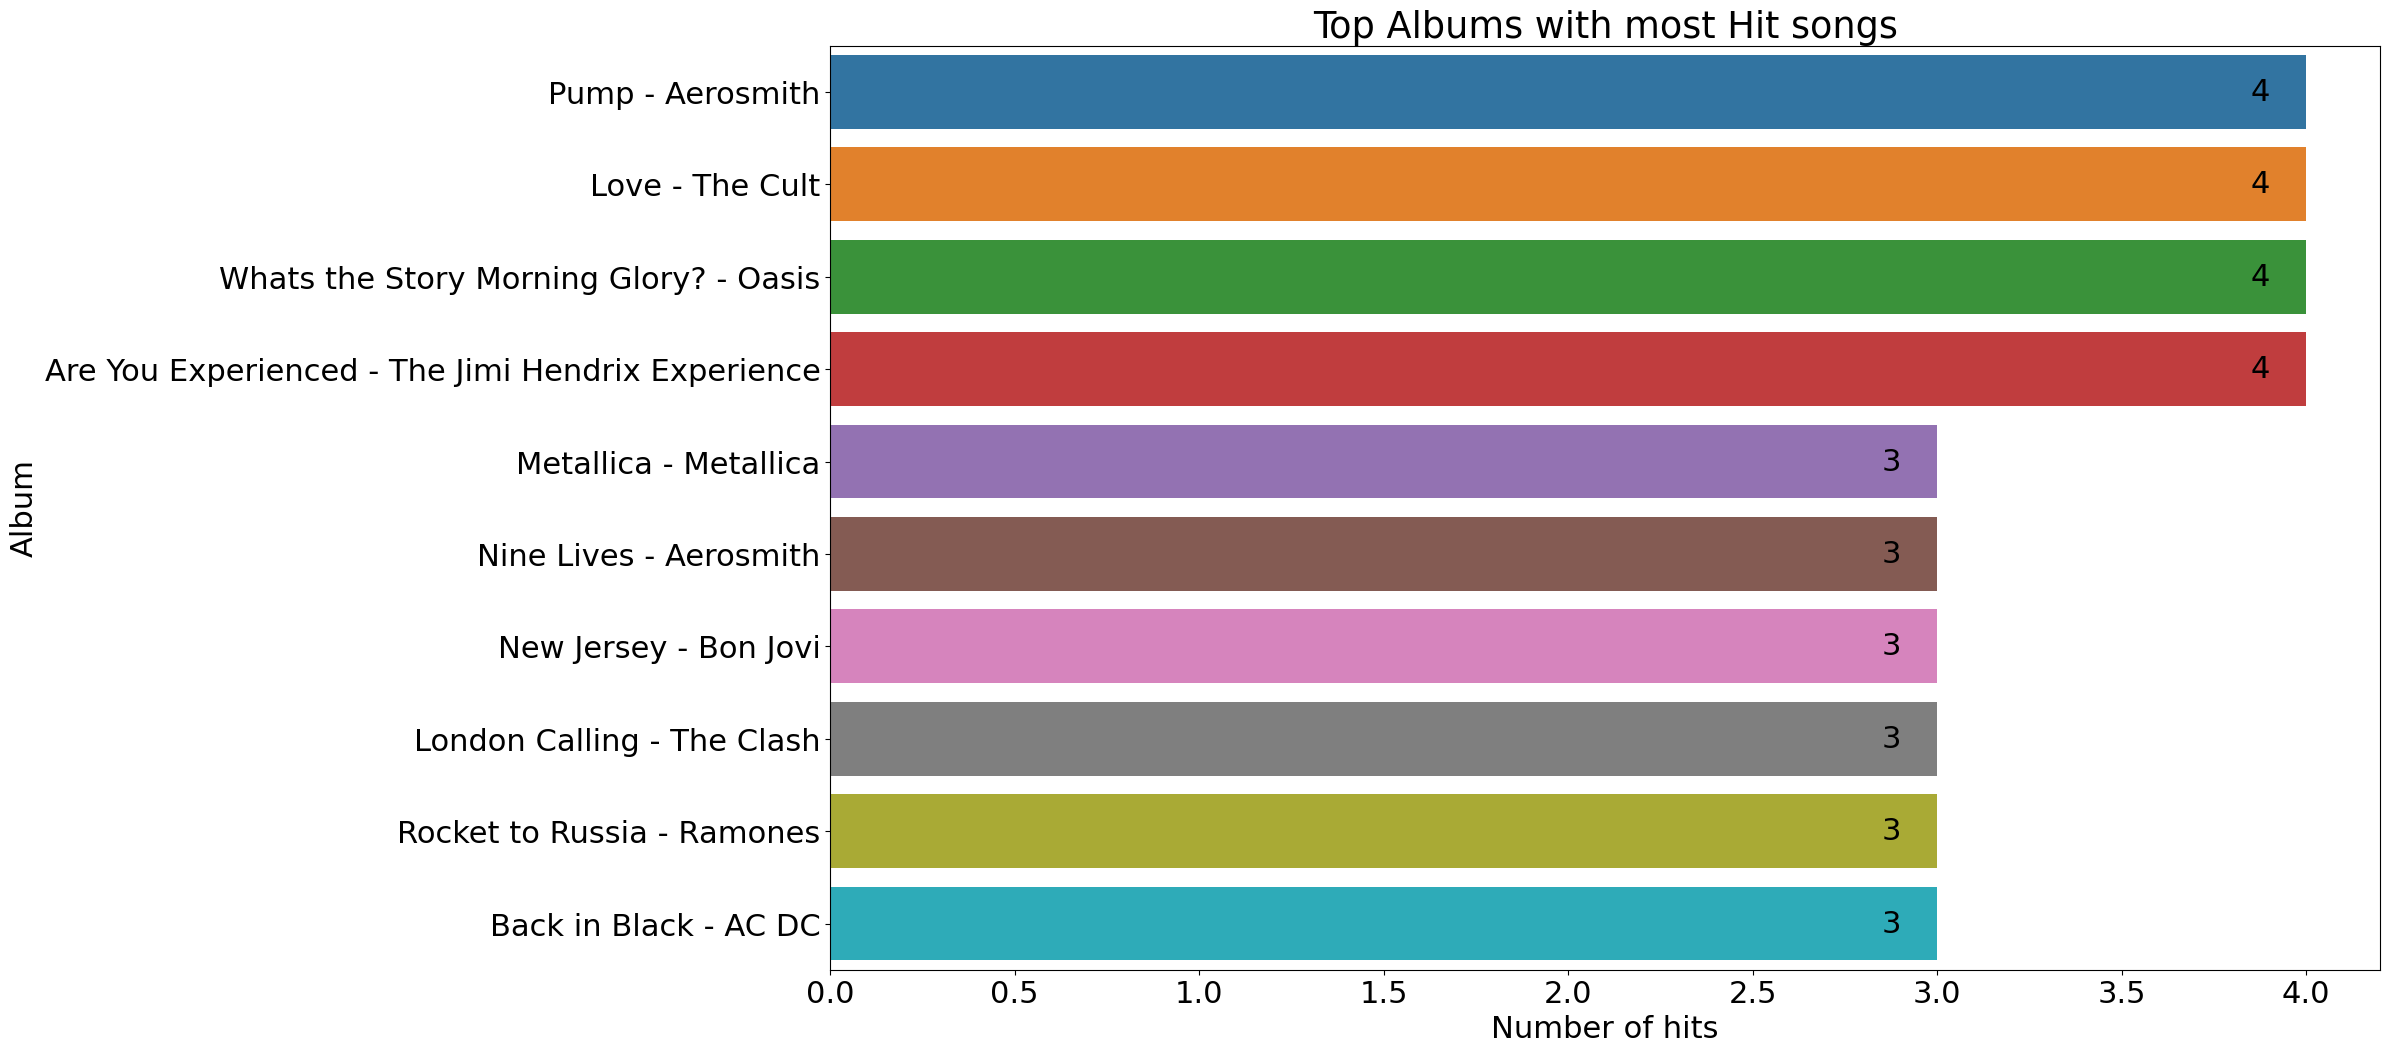

In [55]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20,12)

artist_counts = data2.groupby('Album_Artist').size().sort_values(ascending=False)
top_artists = artist_counts.nlargest(10)
p=sns.barplot(y=top_artists.index, x=top_artists.values)
for container in p.containers:
    p.bar_label(container, padding=-40)
plt.title("Top Albums with most Hit songs")
plt.ylabel("Album")
plt.xlabel("Number of hits")
plt.show()

# Top 25 Genre with most Hit Songs

In [56]:
data1['Genre'].value_counts()

Hard Rock            102
Pop Rock              54
Heavy Metal           35
Alternative Rock      33
Progressive Rock      28
                    ... 
Orchestral Pop         1
Alternative Metal      1
Rap Rock               1
Pop Punk               1
Thrash Metal           1
Name: Genre, Length: 61, dtype: int64

In [57]:
data2 = data[['Genre','2022','2021','2020','2019','2018','2017','2016','2015']]
data2

,Genre,2022,2021,2020,2019,2018,2017,2016,2015
0,Southern Rock,500,<NA>,324,290,132,64,36,<NA>
1,Progressive Rock,499,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Alternative Rock,498,<NA>,<NA>,419,485,403,<NA>,<NA>
3,Rock,497,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Alternative Rock,496,<NA>,<NA>,<NA>,431,443,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...
495,Arena Rock,5,9,129,28,<NA>,154,45,18
496,Pop Rock,4,2,2,3,3,3,3,2
497,Art Rock,3,3,3,1,1,2,2,4
498,Hard Rock,2,4,1,2,2,1,1,3


In [58]:
data2.dtypes

Genre    object
2022      int64
2021      Int64
2020      Int64
2019      Int64
2018      Int64
2017      Int64
2016      Int64
2015      Int64
dtype: object

In [59]:
data2 = data2.fillna(0)

In [60]:
data2

,Genre,2022,2021,2020,2019,2018,2017,2016,2015
0,Southern Rock,500,0,324,290,132,64,36,0
1,Progressive Rock,499,0,0,0,0,0,0,0
2,Alternative Rock,498,0,0,419,485,403,0,0
3,Rock,497,0,0,0,0,0,0,0
4,Alternative Rock,496,0,0,0,431,443,0,0
...,...,...,...,...,...,...,...,...,...
495,Arena Rock,5,9,129,28,0,154,45,18
496,Pop Rock,4,2,2,3,3,3,3,2
497,Art Rock,3,3,3,1,1,2,2,4
498,Hard Rock,2,4,1,2,2,1,1,3


In [61]:
data3 = data2[['2022','2021','2020','2019','2018','2017','2016','2015']]

In [62]:
data4 = data3.mask(data3 > 0, 1)
data4

,2022,2021,2020,2019,2018,2017,2016,2015
0,1,0,1,1,1,1,1,0
1,1,0,0,0,0,0,0,0
2,1,0,0,1,1,1,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
495,1,1,1,1,0,1,1,1
496,1,1,1,1,1,1,1,1
497,1,1,1,1,1,1,1,1
498,1,1,1,1,1,1,1,1


In [63]:
data4['Total']= data4.sum(axis=1)

In [64]:
data4

,2022,2021,2020,2019,2018,2017,2016,2015,Total
0,1,0,1,1,1,1,1,0,6.0
1,1,0,0,0,0,0,0,0,1.0
2,1,0,0,1,1,1,0,0,4.0
3,1,0,0,0,0,0,0,0,1.0
4,1,0,0,0,1,1,0,0,3.0
...,...,...,...,...,...,...,...,...,...
495,1,1,1,1,0,1,1,1,7.0
496,1,1,1,1,1,1,1,1,8.0
497,1,1,1,1,1,1,1,1,8.0
498,1,1,1,1,1,1,1,1,8.0


In [65]:
data5 = pd.concat([data2['Genre'], data4] ,axis=1, ignore_index=False, sort=False)

In [66]:
data5

,Genre,2022,2021,2020,2019,2018,2017,2016,2015,Total
0,Southern Rock,1,0,1,1,1,1,1,0,6.0
1,Progressive Rock,1,0,0,0,0,0,0,0,1.0
2,Alternative Rock,1,0,0,1,1,1,0,0,4.0
3,Rock,1,0,0,0,0,0,0,0,1.0
4,Alternative Rock,1,0,0,0,1,1,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...
495,Arena Rock,1,1,1,1,0,1,1,1,7.0
496,Pop Rock,1,1,1,1,1,1,1,1,8.0
497,Art Rock,1,1,1,1,1,1,1,1,8.0
498,Hard Rock,1,1,1,1,1,1,1,1,8.0


In [67]:
data6 = data5.groupby('Genre')["2022","2021","2020","2019","2018","2017","2016","2015",'Total'].sum()

In [68]:
data6

,2022,2021,2020,2019,2018,2017,2016,2015,Total
Genre,,,,,,,,,
A Cappella,1,1,1,1,1,0,1,0,6.0
Acoustic Rock,1,1,1,1,1,0,1,0,6.0
Alternative Metal,1,0,1,1,0,1,0,0,4.0
Alternative Rock,33,18,14,15,16,15,7,3,121.0
Arena Rock,3,2,1,1,0,1,1,1,10.0
...,...,...,...,...,...,...,...,...,...
Symphonic Rock,2,1,1,1,1,1,1,1,9.0
Synth Rock,1,0,0,0,0,0,0,0,1.0
Synthpop,6,5,1,3,2,1,2,0,20.0


In [69]:
# resetando o index
data6 = data6.reset_index()
data6

,Genre,2022,2021,2020,2019,2018,2017,2016,2015,Total
0,A Cappella,1,1,1,1,1,0,1,0,6.0
1,Acoustic Rock,1,1,1,1,1,0,1,0,6.0
2,Alternative Metal,1,0,1,1,0,1,0,0,4.0
3,Alternative Rock,33,18,14,15,16,15,7,3,121.0
4,Arena Rock,3,2,1,1,0,1,1,1,10.0
...,...,...,...,...,...,...,...,...,...,...
56,Symphonic Rock,2,1,1,1,1,1,1,1,9.0
57,Synth Rock,1,0,0,0,0,0,0,0,1.0
58,Synthpop,6,5,1,3,2,1,2,0,20.0
59,Thrash Metal,1,1,0,0,0,0,0,0,2.0


In [70]:
data6['Total_Percent'] = (data6['Total'] / data6['Total'].sum()) * 100

In [71]:
data6.head()

,Genre,2022,2021,2020,2019,2018,2017,2016,2015,Total,Total_Percent
0,A Cappella,1,1,1,1,1,0,1,0,6.0,0.267977
1,Acoustic Rock,1,1,1,1,1,0,1,0,6.0,0.267977
2,Alternative Metal,1,0,1,1,0,1,0,0,4.0,0.178651
3,Alternative Rock,33,18,14,15,16,15,7,3,121.0,5.404198
4,Arena Rock,3,2,1,1,0,1,1,1,10.0,0.446628


In [72]:
sorted_data6 = data6.sort_values(by=['Total_Percent'], ascending=False)
sorted_data6.head()

,Genre,2022,2021,2020,2019,2018,2017,2016,2015,Total,Total_Percent
21,Hard Rock,102,64,60,68,71,70,57,53,545.0,24.341224
34,Pop Rock,54,35,26,25,32,31,29,22,254.0,11.344350
23,Heavy Metal,35,24,21,27,18,22,17,20,184.0,8.217954
3,Alternative Rock,33,18,14,15,16,15,7,3,121.0,5.404198
41,Progressive Rock,28,20,10,14,10,15,11,9,117.0,5.225547


In [73]:
sorted_data6.tail(10)

,Genre,2022,2021,2020,2019,2018,2017,2016,2015,Total,Total_Percent
10,Comedy rock,1,1,0,0,0,0,0,0,2.0,0.089326
59,Thrash Metal,1,1,0,0,0,0,0,0,2.0,0.089326
60,Worldbeat,1,1,0,0,0,0,0,0,2.0,0.089326
39,Progressive Metal,1,0,0,0,0,0,0,0,1.0,0.044663
37,Power Metal,1,0,0,0,0,0,0,0,1.0,0.044663
51,Roots Rock,1,0,0,0,0,0,0,0,1.0,0.044663
29,Northern Soul,1,0,0,0,0,0,0,0,1.0,0.044663
14,Eurodisco,1,0,0,0,0,0,0,0,1.0,0.044663
5,Art Pop,1,0,0,0,0,0,0,0,1.0,0.044663
57,Synth Rock,1,0,0,0,0,0,0,0,1.0,0.044663


In [74]:
year_mean = round(data['Year'].astype(int).mean(),0)

In [75]:
from datetime import datetime

In [76]:
currentYear = datetime.now().year

In [77]:
age_mean = currentYear - year_mean
str(int(age_mean)) + " anos"

'40 anos'

# Conclusão

Futuramente eu voltarei a este Dataset, mas creio que ele já está grande.
No que se tratar de músicas os parâmetros são bem subjetivos. Portanto as suposições sobre esses parâmetros são meramente subjetivas. Exemplo: Todas as bandas são compostas de pessoas únicas, só existe um Bruce Dickinson e um Eddie Van Halen. Não temos acesso aos critérios de definições dos subgêneros ('Gender') nem do tamanho do universo das bandas destes mesmos subgêneros. Por mais óbvio que pareça ser, não temos dimensão do quão difícil é uma banda entrar nessa lista e muito menos cravar quem possa aparecer em 2023 (através destes dados).

No entanto em uma análise é possível afirmar sim que nesse período a média de idade dos álbuns é de 40 anos. Não foi feito nenhum tipo de análise referente ao ano da música. Não é possível afirmar se sua música vai demorar 40 anos para chgar aos top 500 ou se ela será lembrada nos top 500 daqui a 40 anos ou até mesmo se a mesma será top 500 amanhã.É possível afirmar também que em todos os anos do dataset o Hard Rock (24,34%), Pop Rock e outros sempre aparecem, diferentemente do Art Pop que tem apenas uma aparição nesses últimos anos. 

Portanto, caso você tenha alguns amigos e vontade de fazer algumas pessoas "baterem a cabeça" por aí e começar a banda agora com o sonho de estar nesta lista nos próximos anos. Eu tenho algumas notícias:
 - Sugiro outras informações e até mesmo outros datasets a fim de encontrarmos mais correlações entre as músicas;
 - Converse ou estude com  Aerosmith, The Beatles, Bon Jovi, Van Halen, The Rolling Stones. Pois eles foram os que mais colocaram músicas no dataset (independente de posição);
 - Se sua preferência for pela primeira posição, sugiro uma conversa ou um estudo com Queen , Led Zeppelin ou  Iron Maiden;
 - Escutar todas as músicas deste dataset;
 - Tenha paciência, pois de acordo com esse dataset sem qualquer outro tipo de parâmetro, equivocadamente ele diz que após o primeiro álbun, em média demora 40 anos para entrar nessa lista;
 - Sugiro uma banda de Hard Rock e não de Synth Rock apesar de não saber o tamanho do universo de bandas em disputa para esses gêneros;
 - O trabalho continuará no Microsoft Power BI para encontrar relações entres os quartis dos dataset.